In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
airlines = pd.read_csv('CSV_data/nycflights13/nyc_airlines.csv')
airports = pd.read_csv('CSV_data/nycflights13/nyc_airports.csv')
flights = pd.read_csv('CSV_data/nycflights13/nyc_flights.csv')
planes = pd.read_csv('CSV_data/nycflights13/nyc_planes.csv')
weather = pd.read_csv('CSV_data/nycflights13/nyc_weather.csv')

In [129]:
#Analysis of numbers of flights
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

[Text(0.5, 1.0, 'Number of flights per origin airport')]

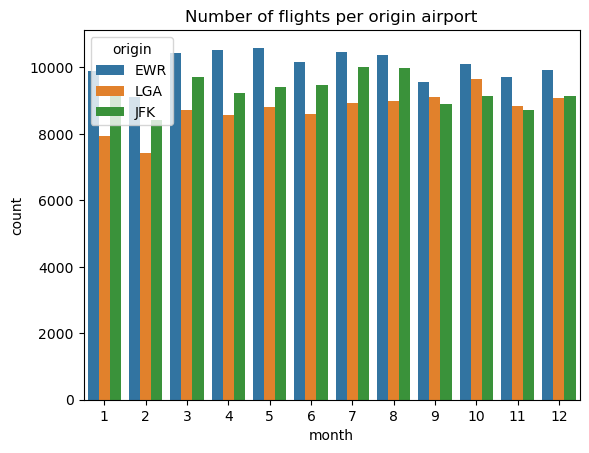

In [81]:
sns.countplot(x='month', data=flights, hue='origin').set(title='Number of flights per origin airport')

[Text(0.5, 1.0, 'Number of flights per carrier')]

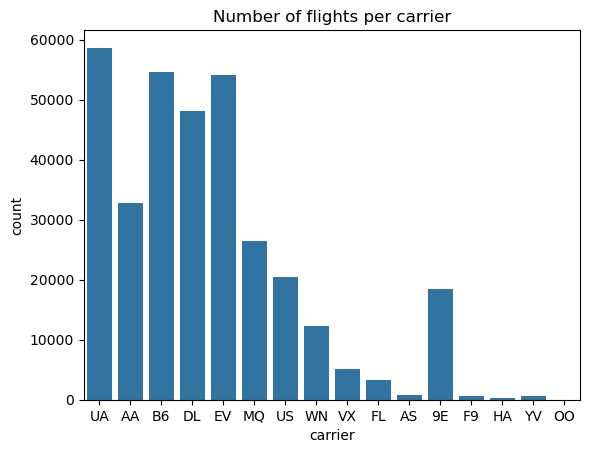

In [33]:
sns.countplot(x='carrier', data=flights).set(title='Number of flights per carrier')

In [87]:
normalized_carriers = flights['carrier'].value_counts(normalize=True)
print(normalized_carriers)

carrier
UA    0.174196
B6    0.162229
EV    0.160858
DL    0.142855
AA    0.097183
MQ    0.078381
US    0.060978
9E    0.054814
WN    0.036449
VX    0.015328
FL    0.009680
AS    0.002120
F9    0.002034
YV    0.001785
HA    0.001016
OO    0.000095
Name: proportion, dtype: float64


In [167]:
print('Let omit the carriers with less than 1% of flights:')
low_carriers = normalized_carriers[normalized_carriers > 0.01]
flights_no_low_carriers = flights[flights['carrier'].isin(low_carriers.index)]

Let omit the carriers of less than 1% of flights:


[Text(0.5, 1.0, 'Flight distance per carrier')]

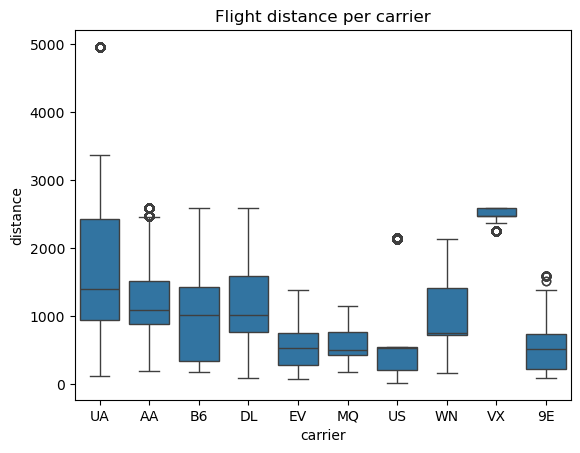

In [169]:
sns.boxplot(y='distance', x='carrier', data=flights_no_low_carriers).set(title='Flight distance per carrier')

In [171]:
#Analysis of not realised flights
nan_flights = flights[flights['dep_time'].isna()]

[Text(0.5, 1.0, 'Number of flights without departure time per month')]

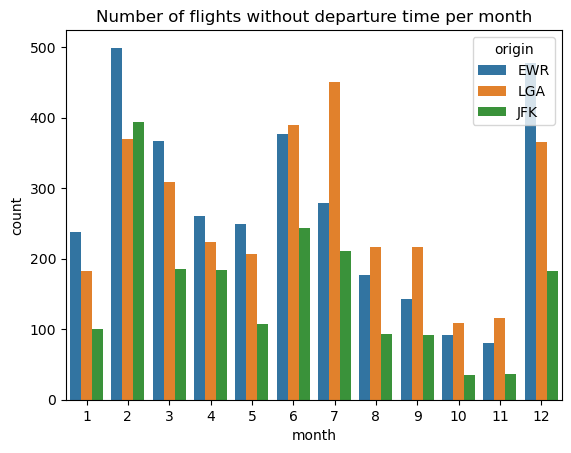

In [173]:
sns.countplot(x='month', data=nan_flights, hue='origin').set(title='Number of flights without departure time per month')

[Text(0.5, 1.0, 'Number of flights without departure time per carrier')]

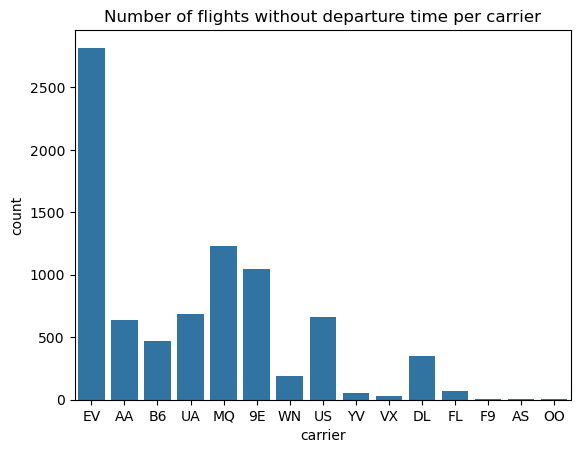

In [45]:
sns.countplot(x='carrier', data=nan_flights).set(title='Number of flights without departure time per carrier')

[Text(0.5, 1.0, 'Number of flights without departure time per origin airport')]

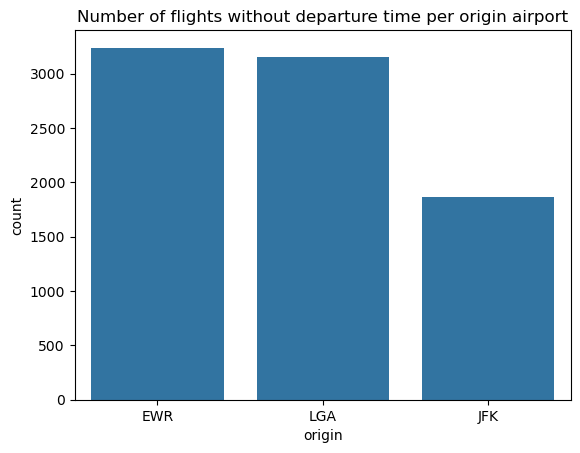

In [47]:
sns.countplot(x='origin', data=nan_flights).set(title='Number of flights without departure time per origin airport')